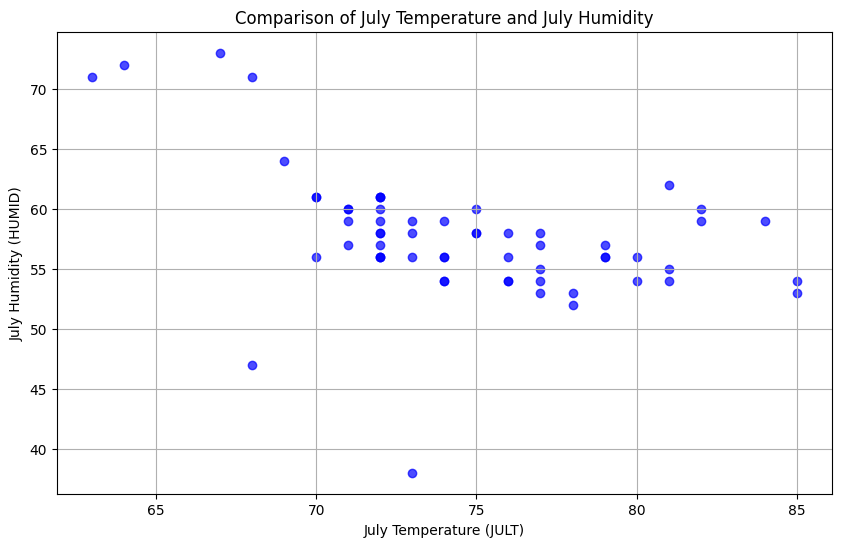

Correlation coefficient between July Temperature and July Humidity: -0.45280915004589883

Basic statistics:
            JULT      HUMID
count  60.000000  60.000000
mean   74.583333  57.666667
std     4.763177   5.369931
min    63.000000  38.000000
25%    72.000000  55.000000
50%    74.000000  57.000000
75%    77.250000  60.000000
max    85.000000  73.000000
Estimated humidity when the temperature is 70 degrees: 60.01%


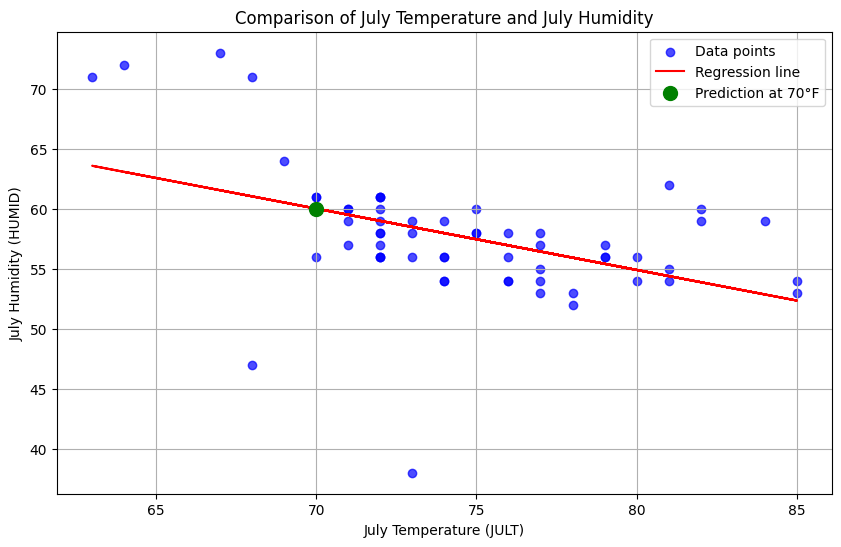

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import requests

# URL of the dataset
url = "https://lib.stat.cmu.edu/datasets/pollution"

# Fetching the data
response = requests.get(url)
data = response.text

# Splitting the data into lines
lines = data.split("\n")

# Extracting the data starting from line 22
data_lines = lines[22:]

# Joining adjacent lines to form full records of 16 variables
full_records = []
temp_record = []
for line in data_lines:
    temp_record.extend(line.split())
    if len(temp_record) == 16:
        full_records.append(temp_record)
        temp_record = []

# Define the column names
columns = [
    "PREC",
    "JANT",
    "JULT",
    "OVR65",
    "POPN",
    "EDUC",
    "HOUS",
    "DENS",
    "NONW",
    "WWDRK",
    "POOR",
    "HC",
    "NOX",
    "SO2",
    "HUMID",
    "MORT",
]

# Creating a DataFrame from the full records
df = pd.DataFrame(full_records, columns=columns)

# Convert the columns to numeric values
df["JULT"] = pd.to_numeric(df["JULT"])
df["HUMID"] = pd.to_numeric(df["HUMID"])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["JULT"], df["HUMID"], alpha=0.7, color="blue")
plt.title("Comparison of July Temperature and July Humidity")
plt.xlabel("July Temperature (JULT)")
plt.ylabel("July Humidity (HUMID)")
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df["JULT"].corr(df["HUMID"])

# Calculate basic statistics
stats = df[["JULT", "HUMID"]].describe()

# Display the results
print(
    f"Correlation coefficient between July Temperature and July Humidity: {correlation}"
)
print("\nBasic statistics:")
print(stats)
# Prepare the data for linear regression
X = df[["JULT"]].values.reshape(-1, 1)
y = df["HUMID"].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the humidity for a temperature of 70 degrees
temperature_70 = np.array([[70]])
predicted_humidity = model.predict(temperature_70)[0]

# Display the result
print(
    f"Estimated humidity when the temperature is 70 degrees: {predicted_humidity:.2f}%"
)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df["JULT"], df["HUMID"], alpha=0.7, color="blue", label="Data points")
plt.plot(df["JULT"], model.predict(X), color="red", label="Regression line")
plt.scatter(
    70, predicted_humidity, color="green", s=100, zorder=5, label="Prediction at 70°F"
)
plt.title("Comparison of July Temperature and July Humidity")
plt.xlabel("July Temperature (JULT)")
plt.ylabel("July Humidity (HUMID)")
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3e450ef-1dc2-468f-9116-18b68ee623c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>